In [ ]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
#Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/allyjavier/house-prices/refs/heads/main/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df1 = df.copy() #copy of the dataframe

#**Exploratory Data Analysis**

In [ ]:
print(df.shape)

(1460, 81)


In [ ]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
pd.set_option('display.max_rows', None) #display all rows

In [ ]:
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [ ]:
pd.reset_option('display.max_rows') #resets to default setting

In [ ]:
#Drop irrelevant columns
df.drop('Id', axis=1, inplace = True)

In [ ]:
num_df = df.select_dtypes(include=['number'])
num_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
#Analyze 'SalePrice'
df['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


<ipython-input-81-1c647b2a4c6e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

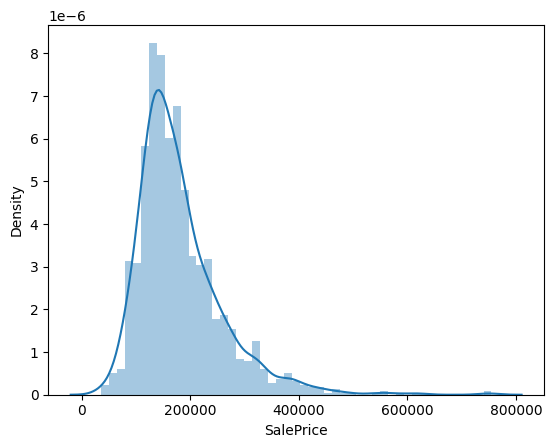

In [ ]:
#Visualize 'SalePrice'
sns.distplot(df['SalePrice'])

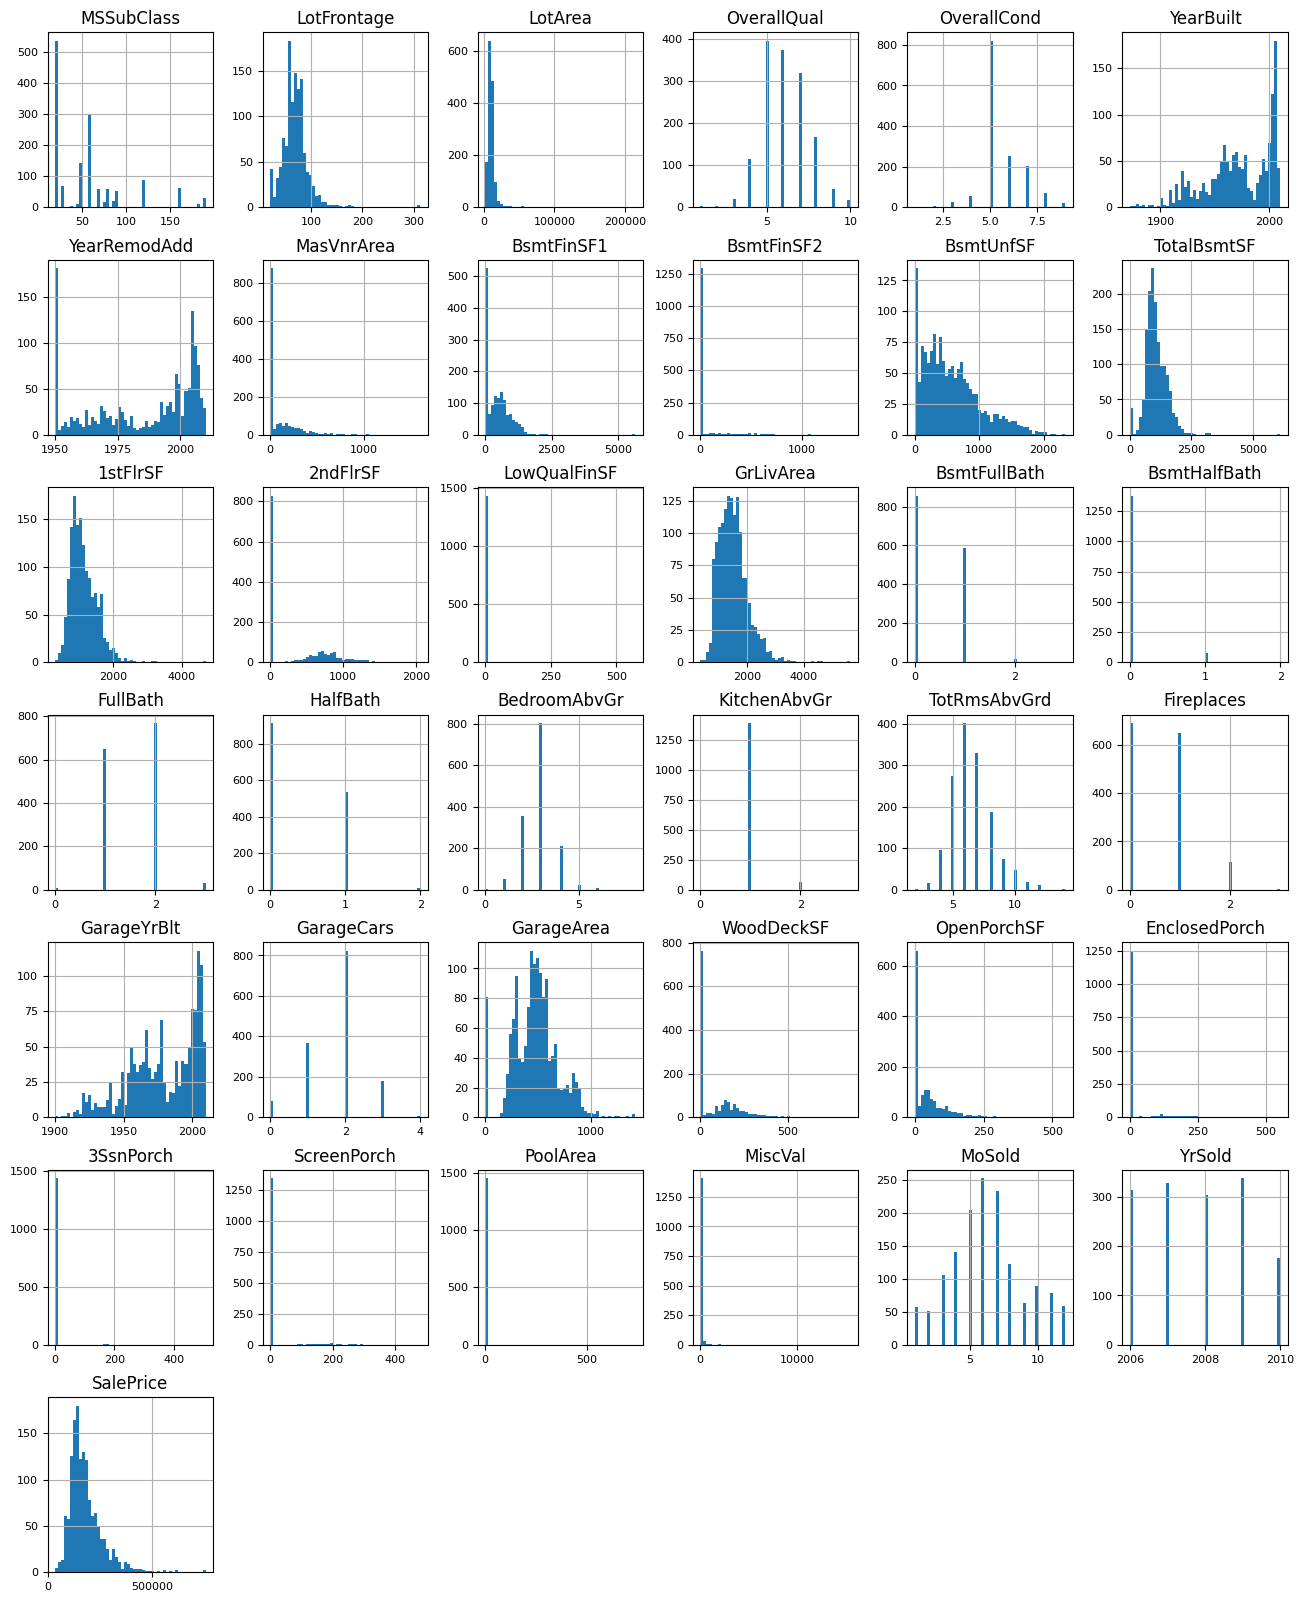

In [ ]:
#Plot distribution of each feature
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

#Features with similar distrubutions with 'SalePrice': 1) LotFrontage, 2) TotalBsmtSf, 3) 1stFlrSf, 4) GrLivArea

###Correlation

In [ ]:
# Correlated values with SalePrice
corr_numdf = num_df.corr()['SalePrice'][:-1]
list_corr = corr_numdf[abs(corr_numdf) > 0.5].sort_values(ascending=False)
print(list_corr)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


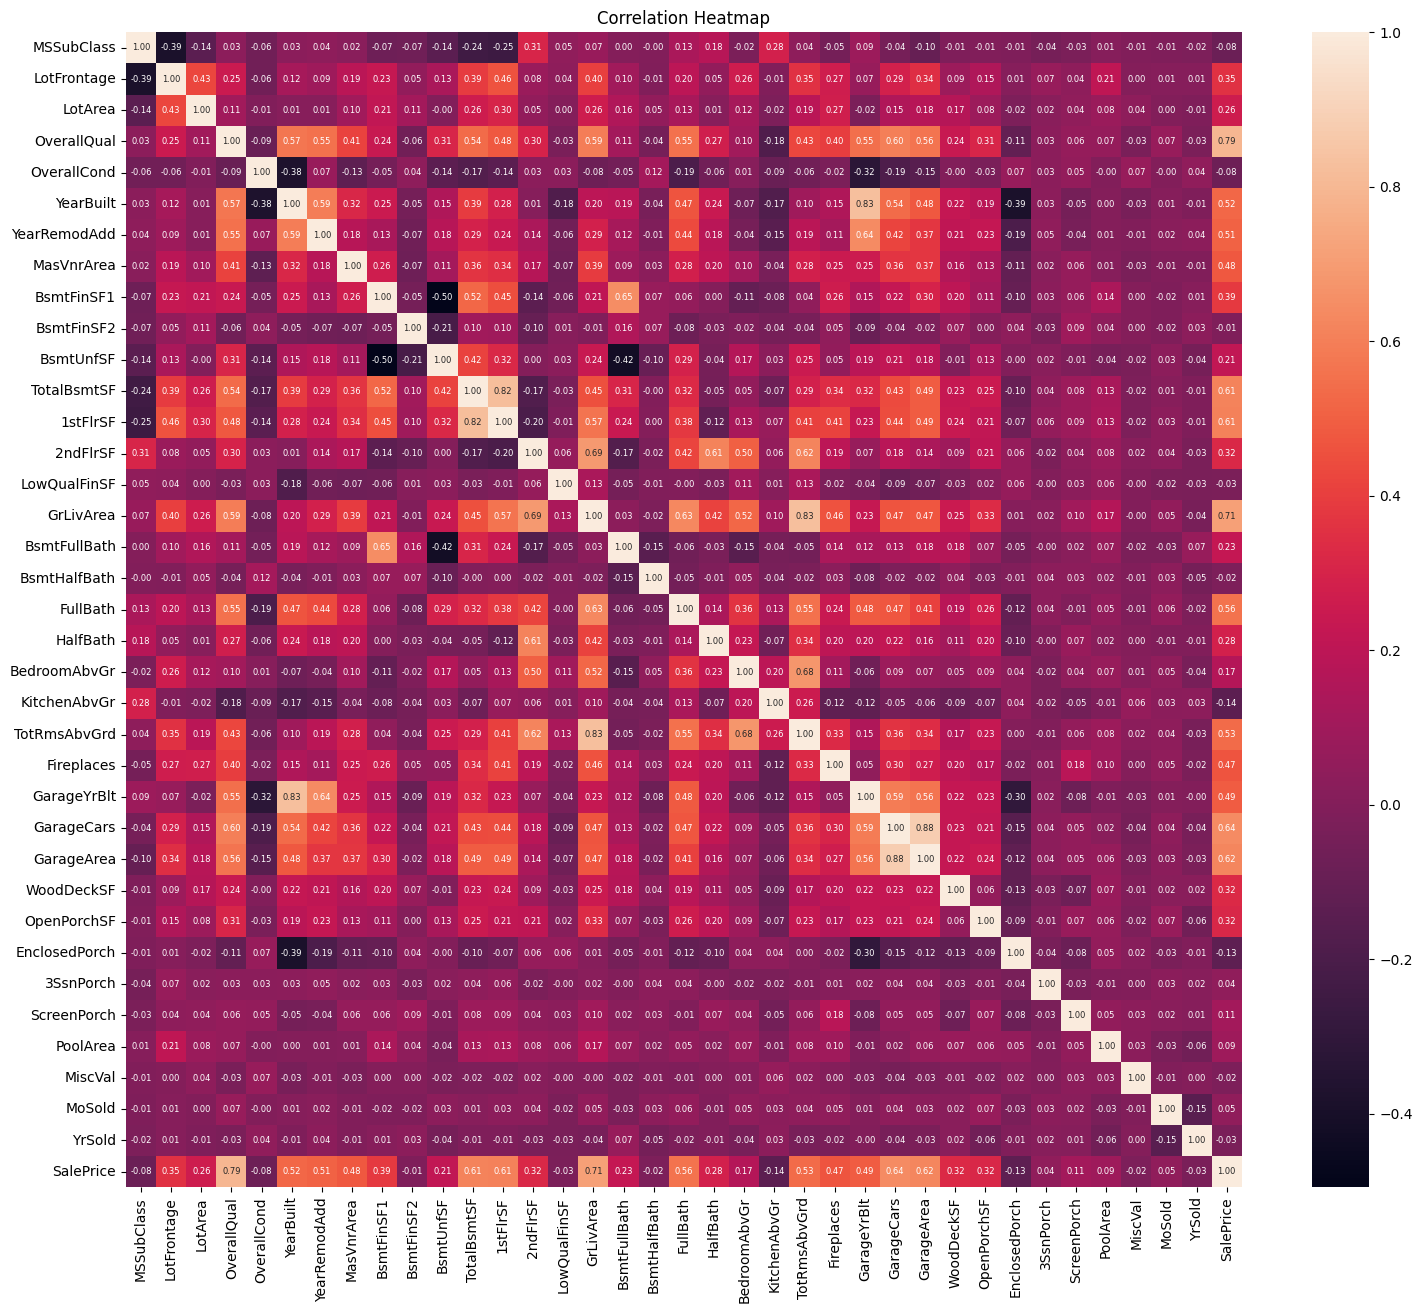

In [ ]:
# Heatmap for correlation matrix
plt.figure(figsize=(18, 15))
sns.heatmap(num_df.corr(), fmt=".2f", annot_kws={"size": 6}, cmap='rocket', annot=True)
plt.title('Correlation Heatmap')
plt.show()

#Features with highest correlation with 'SalePrice': 1) OverallQual (0.79), 2) GrLivArea (0.71), 3) GarageCars (0.64), 4) GarageArea (0.62), 5) TotalBsmtSF (0.61) & 1stFlrSF(0.61)

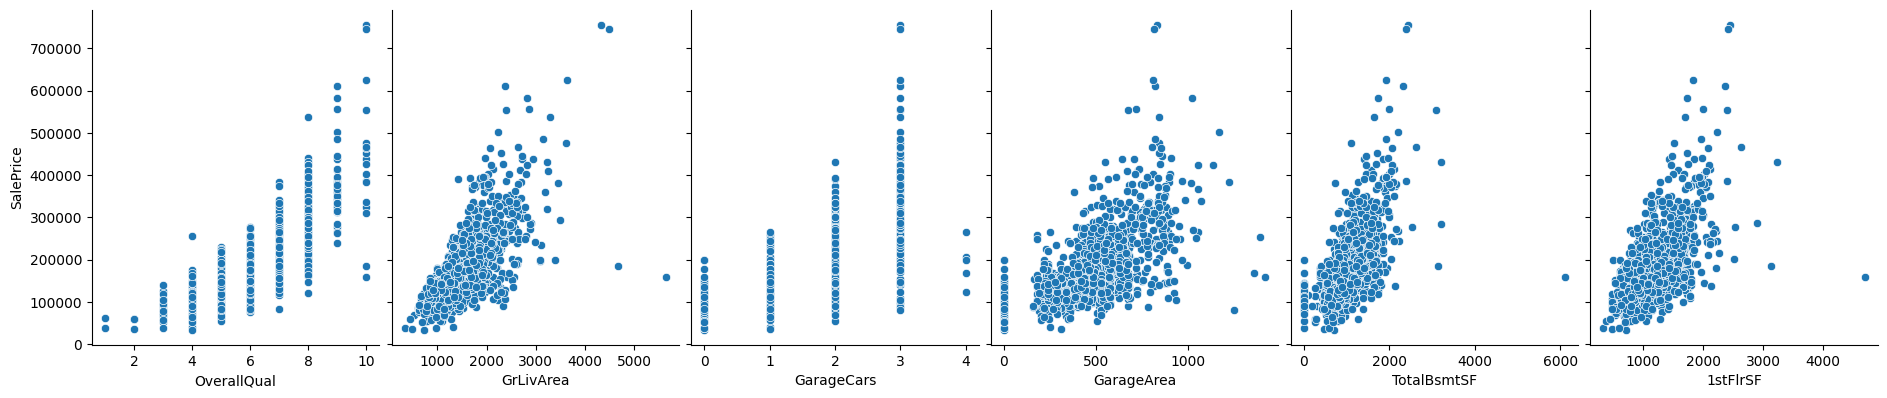

In [ ]:
#Detect outliers
corr_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF', '1stFlrSF']
sns.pairplot(data=num_df, x_vars=corr_cols, y_vars=['SalePrice'], height=4, aspect=0.8)

#**Data Preparation**

In [ ]:
#Normally distrubte 'SalePrice' data since the distribtuion is skewed to the right
df["SalePrice"] = np.log1p(df["SalePrice"]) #np.log1p -> function that fixes skewed data

<ipython-input-87-ee23fe7e19e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

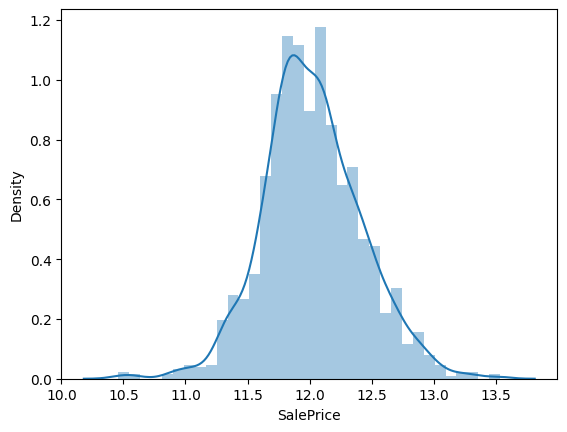

In [ ]:
sns.distplot(df['SalePrice'])

##Identify missing values

In [ ]:
#Review missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [ ]:
#Imputing missing values

#Features with NA descriptions = None
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'):
    df[col] = df[col].fillna('None')

#'Garage' - Object dtypes with missing data, replace with 'None'
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

#'Garage' - Float and int dtypes with missing data, replace with 0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

#'Bsmt'- Object dtypes with missing data, replace with 'None'
for col in ('BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1'):
    df[col] = df[col].fillna('None')

#'Mas' features
df["MasVnrType"] = df["MasVnrType"].fillna("None") #Object
df["MasVnrArea"] = df["MasVnrArea"].fillna(0) #Float

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
#Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#String dtype, impute with mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [ ]:
#Check for null values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MSSubClass,0,0.0
MSZoning,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0


##Feature Engineering

In [ ]:
#Converting numerical variables to strings to accurately reflect their categorical nature.
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

###Numerical Features

In [ ]:
#Add new features
#Scale the numerical features only
df['TotalSF'] = (df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']) #total square footage
df['Bathrooms'] = df['FullBath'] + df['HalfBath']*0.5 #total bathrooms
df['YrBltAndRemod'] = (df['YearBuilt'] + df['YearRemodAdd'])/2 #year built and remodelled

In [ ]:
num_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
#Standardizing the data to minimize outliers
from sklearn.preprocessing import RobustScaler

num_df = df.drop(columns=['SalePrice']).select_dtypes(include=['number'])

# Initialize RobustScaler
scaler = RobustScaler()

# Fit and transform the numerical columns
for col in num_df.columns:
    df[col] = scaler.fit_transform(df[[col]])

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,Bathrooms,YrBltAndRemod
0,60,RL,-0.25,-0.254076,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.5,0.0,0.652174,0.243243,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.193303,Gd,TA,PConc,Gd,TA,No,GLQ,0.452790,Unf,0.0,-0.559829,-0.269652,GasA,Ex,Y,SBrkr,-0.453608,1.173077,0.0,0.380070,1.0,0.0,0.0,1.0,0.0,0.0,Gd,1.0,Typ,-1.0,None,Attchd,0.604651,RFn,0.0,0.281573,TA,TA,Y,0.000000,0.529412,0.0,0.0,0.0,0.0,None,None,None,0.0,2,2008,WD,Normal,12.247699,0.092509,0.333333,0.643533
1,20,RL,0.50,0.030015,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,0.0,3.0,0.065217,-0.486486,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,0.834679,Unf,0.0,-0.330769,0.538308,GasA,Ex,Y,SBrkr,0.343643,0.000000,0.0,-0.312090,0.0,1.0,0.0,0.0,0.0,0.0,TA,0.0,Typ,0.0,TA,Attchd,-0.023256,RFn,0.0,-0.082816,TA,TA,Y,1.773810,-0.367647,0.0,0.0,0.0,0.0,None,None,None,0.0,5,2007,WD,Normal,12.109016,0.050277,0.000000,-0.037855
2,60,RL,-0.10,0.437624,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.5,0.0,0.608696,0.216216,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.986301,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.143910,Unf,0.0,-0.074359,-0.142289,GasA,Ex,Y,SBrkr,-0.327933,1.189560,0.0,0.497489,1.0,0.0,0.0,1.0,0.0,0.0,Gd,0.0,Typ,0.0,TA,Attchd,0.558140,RFn,0.0,0.530021,TA,TA,Y,0.000000,0.250000,0.0,0.0,0.0,0.0,None,None,None,0.0,9,2008,WD,Normal,12.317171,0.233283,0.333333,0.605678
3,70,RL,-0.50,0.017663,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,0.5,0.0,-1.260870,-0.648649,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,-0.235170,Unf,0.0,0.106838,-0.468657,GasA,Gd,Y,SBrkr,-0.247423,1.038462,0.0,0.390885,1.0,0.0,-1.0,0.0,0.0,0.0,Gd,0.5,Typ,0.0,Gd,Detchd,0.488372,Unf,1.0,0.670807,TA,TA,Y,0.000000,0.147059,272.0,0.0,0.0,0.0,None,None,None,0.0,2,2006,WD,Abnorml,11.849405,-0.001006,-0.666667,-0.883281
4,60,RL,0.70,1.181201,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,1.0,0.0,0.586957,0.162162,Gable,CompShg,VinylSd,VinylSd,BrkFace,2.130898,Gd,TA,PConc,Gd,TA,Av,GLQ,0.381186,Unf,0.0,0.021368,0.305473,GasA,Ex,Y,SBrkr,0.113893,1.446429,0.0,1.134029,1.0,0.0,0.0,1.0,1.0,0.0,Gd,1.5,Typ,0.0,TA,Attchd,0.534884,RFn,1.0,1.474120,TA,TA,Y,1.142857,0.867647,0.0,0.0,0.0,0.0,None,None,None,0.0,12,2008,WD,Normal,12.429220,0.873806,0.333333,0.567823


###Categorical data

In [ ]:
#Handling categorical data
cat_df = df.select_dtypes(include=['category', 'object'])
cat_df

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,2,2008,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,5,2007,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,9,2008,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,2,2006,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,8,2007,WD,Normal
1456,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,None,MnPrv,None,2,2010,WD,Normal
1457,70,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,None,GdPrv,Shed,5,2010,WD,Normal
1458,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,None,Attchd,Unf,TA,TA,Y,None,None,None,4,2010,WD,Normal


In [ ]:
print(cat_df.columns)

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [ ]:
#Label encoding for ordinal categories
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'LotShape', 'LandSlope')
for c in cols:
  labelencoder = LabelEncoder()
  labelencoder.fit(list(df[c].values))
  df[c] = labelencoder.transform(list(df[c].values))

In [ ]:
#Apply one-hot-encode
df_encoded = pd.get_dummies(df)

In [ ]:
df_encoded #sanity check

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SalePrice,TotalSF,Bathrooms,YrBltAndRemod,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,Sale

In [ ]:
df_encoded['SalePrice']

,SalePrice
0,12.247699
1,12.109016
2,12.317171
3,11.849405
4,12.429220
...,...
1455,12.072547
1456,12.254868
1457,12.493133
1458,11.864469


#**Data Modelling**

In [ ]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop(columns = 'SalePrice')
y = df_encoded['SalePrice']

# First split: Training and Test (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Train and Validation (80% of training data for training, 20% for validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(876, 269)
(292, 269)
(292, 269)


##Setting a baseline (no parameter tuning)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Use the default setting of the following models
LR = LinearRegression()
LR.fit(X_train, y_train)
Lasso = Lasso()
Lasso.fit(X_train, y_train)
Ridge1 = Ridge()
Ridge1.fit(X_train, y_train)
kNN = KNeighborsRegressor()
kNN.fit(X_train,y_train)
DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
GBM = GradientBoostingRegressor()
GBM.fit(X_train,y_train)

y_pred_LR = LR.predict(X_test)
y_pred_Lasso = Lasso.predict(X_test)
y_pred_Ridge = Ridge1.predict(X_test)
y_pred_kNN = kNN.predict(X_test)
y_pred_DT = DT.predict(X_test)
y_pred_RF = RF.predict(X_test)
y_pred_GBM = GBM.predict(X_test)

cols = ['Machine Learning Regression Method','Train R^2', 'Test R^2']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = ['Linear Regression', LR.score(X_train, y_train), LR.score(X_test, y_test)]
df2.loc[1] = ['Linear Regression + Lasso', Lasso.score(X_train, y_train), Lasso.score(X_test, y_test)]
df2.loc[2] = ['Linear Regression + Ridge', Ridge1.score(X_train, y_train), Ridge1.score(X_test, y_test)]
df2.loc[3] = ['kNN', kNN.score(X_train, y_train), kNN.score(X_test, y_test)]
df2.loc[4] = ['Decision Tree',DT.score(X_train, y_train), DT.score(X_test, y_test)]
df2.loc[5] = ['Random Forest',RF.score(X_train, y_train), RF.score(X_test, y_test)]
df2.loc[6] = ['Gradient Boosting Method',GBM.score(X_train, y_train), GBM.score(X_test, y_test)]

df2

,Machine Learning Regression Method,Train R^2,Test R^2
0,Linear Regression,0.953341,0.902641
1,Linear Regression + Lasso,0.110980,0.059463
2,Linear Regression + Ridge,0.942659,0.900601
3,kNN,0.730270,0.602830
4,Decision Tree,1.000000,0.791814
5,Random Forest,0.981780,0.881976
6,Gradient Boosting Method,0.970368,0.889598


###Linear Regression

In [ ]:
from itertools import product
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# Define the hyperparameter grid to search
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [False]
}

lr_model = LinearRegression()

# Iterate over the hyperparameter grid and evaluate on the validation set
best_params = None
best_val_score = float('-inf')  # Initialize with negative infinity

for params in [dict(zip(param_grid, v)) for v in product(*param_grid.values())]:
    lr_model.set_params(**params)
    lr_model.fit(X_train, y_train)
    y_val_pred = lr_model.predict(X_val)
    val_score = r2_score(y_val, y_val_pred)

    if val_score > best_val_score:
        best_val_score = val_score
        best_params = params

print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_lr_model = LinearRegression(**best_params)
best_lr_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = best_lr_model.predict(X_test)
y_train_pred = best_lr_model.predict(X_train)

# Evaluate on the test set
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print("\nTrain R^2:", r2_score(y_train, y_train_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", mean_squared_error(y_train, y_train_pred, squared=False))
print("\nTest R^2:", test_r2)
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)

Best Hyperparameters: {'fit_intercept': True, 'copy_X': True, 'positive': False}

Train R^2: 0.9533411016185793
Train MAE: 0.060823769578876724
Train RMSE: 0.0842006495132627

Test R^2: 0.9026410234197542
Test MAE: 0.09546426633694881
Test RMSE: 0.13478966899453387


                  Feature  Coefficient  Absolute Coefficient
149      RoofMatl_ClyTile    -2.121688              2.121688
126       Condition2_PosN    -0.711468              0.711468
156      RoofMatl_WdShngl     0.513044              0.513044
150      RoofMatl_CompShg     0.446811              0.446811
153         RoofMatl_Roll     0.442586              0.442586
155      RoofMatl_WdShake     0.420892              0.420892
123      Condition2_Feedr     0.376610              0.376610
216        Functional_Sev    -0.361660              0.361660
143        RoofStyle_Flat     0.298356              0.298356
67       MSZoning_C (all)    -0.271290              0.271290
159   Exterior1st_BrkComm    -0.228662              0.228662
203          Heating_Wall     0.215844              0.215844
201          Heating_Grav    -0.196465              0.196465
181     Exterior2nd_Other    -0.187215              0.187215
211       Functional_Maj1     0.177375              0.177375
226     GarageFinish_Non

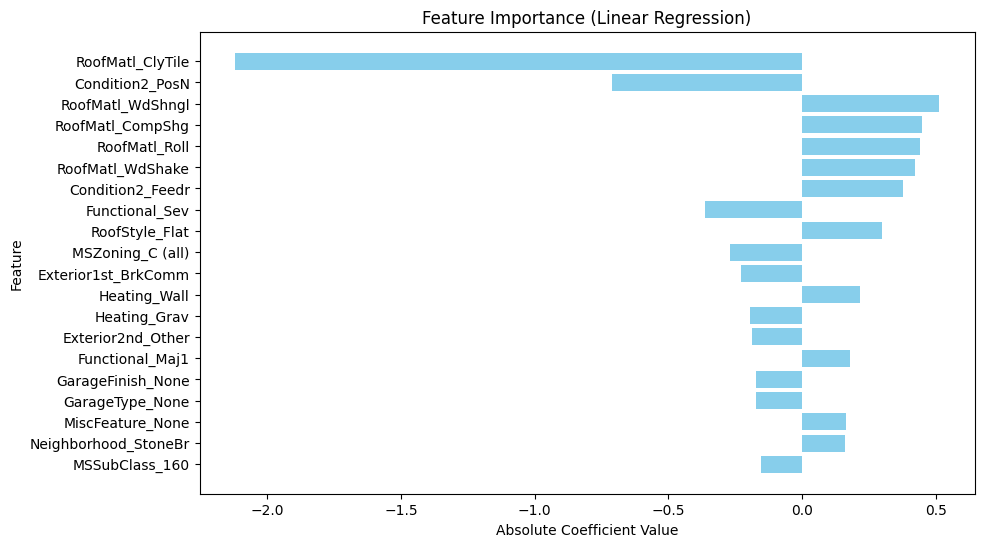

In [ ]:
# Train the model with the best hyperparameters
best_lr_model = LinearRegression(**best_params)
best_lr_model.fit(X_train, y_train)

# Get the feature coefficients
coefficients = best_lr_model.coef_

# Assuming X_train is a DataFrame, extract feature names
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])]

# Create a DataFrame to display feature names and their coefficients
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort features by absolute coefficient value
importance_df['Absolute Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)
top_20 = importance_df.head(20)

print(top_20)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_20['Feature'], top_20['Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Linear Regression)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

###Ridge

In [ ]:
# Define the hyperparameter grid to search
param_grid = {
    'alpha': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['svd', 'cholesky', 'sag', 'saga'],  # Solver algorithm
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

# Create a Ridge Regression model
ridge_model = Ridge()

# Iterate over the hyperparameter grid and evaluate on the validation set
best_params = None
best_val_score = float('-inf')

for params in [dict(zip(param_grid, v)) for v in product(*param_grid.values())]:
    ridge_model.set_params(**params)

    # Check if the solver and positive constraint are compatible
    if params['positive'] and params['solver'] in ['svd', 'cholesky', 'sag', 'saga']:
        # If not compatible, skip this combination
        continue  # Skip if 'positive=True' and solver is not 'auto' or 'lbfgs'


    ridge_model.fit(X_train, y_train)
    y_val_pred = ridge_model.predict(X_val)
    val_score = r2_score(y_val, y_val_pred)

    if val_score > best_val_score:
        best_val_score = val_score
        best_params = params

print("Best Hyperparameters:", best_params)


# Train the model with the best hyperparameters
best_ridge_model = Ridge(**best_params)
best_ridge_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = best_ridge_model.predict(X_test)
y_train_pred = best_ridge_model.predict(X_train)

# Evaluate on the test set
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print("\nTrain R^2:", r2_score(y_train, y_train_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", mean_squared_error(y_train, y_train_pred, squared=False))
print("\nTest R^2:", test_r2)
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)

Best Hyperparameters: {'alpha': 10, 'solver': 'svd', 'fit_intercept': True, 'copy_X': True, 'positive': False}

Train R^2: 0.9238668499556706
Train MAE: 0.07555975513271328
Train RMSE: 0.10755611351395077

Test R^2: 0.890534762413921
Test MAE: 0.09897050757043986
Test RMSE: 0.14292451225059807


             Feature  Coefficient
16      BsmtFinType2     0.197767
4        OverallQual     0.177026
39        GarageCond     0.162899
38        GarageQual     0.162478
5        OverallCond     0.153568
10         ExterCond     0.126997
12          BsmtCond     0.124895
47             Fence     0.119453
14      BsmtFinType1     0.105945
34       FireplaceQu     0.103339
46            PoolQC     0.101889
11          BsmtQual     0.087530
9          ExterQual     0.084053
31       KitchenQual     0.077020
13      BsmtExposure     0.076379
2           LotShape     0.063822
35       GarageYrBlt    -0.054023
20         HeatingQC     0.047420
81  Utilities_AllPub     0.033921
73       Street_Pave     0.033863


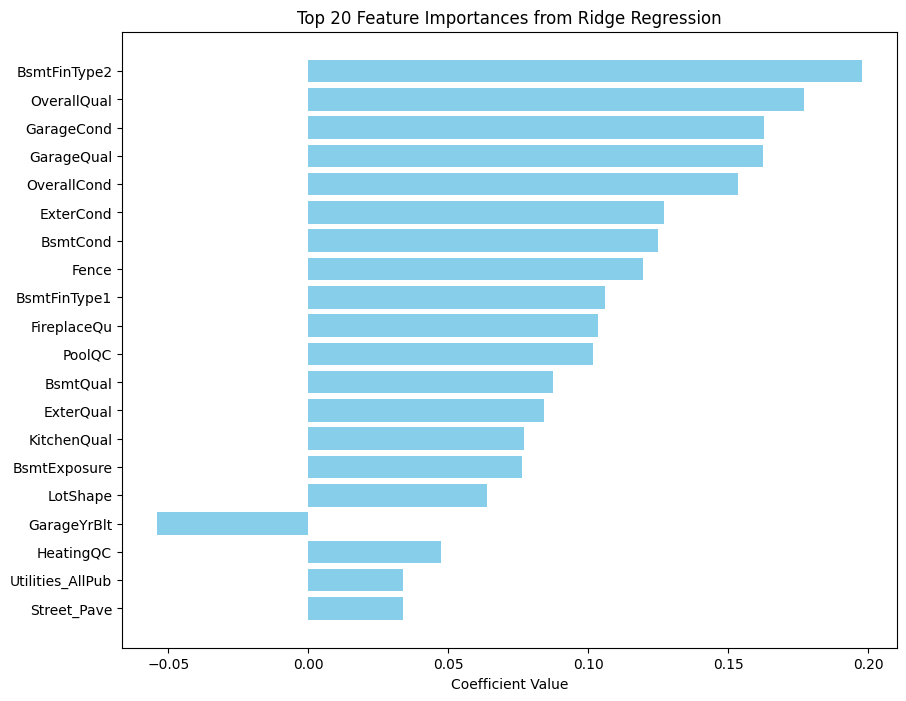

In [ ]:
coefficients = ridge_model.coef_
features = X_train.columns

# Create a DataFrame for sorting
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort by absolute value of coefficients in descending order
importance_df['Absolute Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Select top 20 features
top_20 = importance_df.head(20)

# Display the top 20 features
print(top_20[['Feature', 'Coefficient']])

# Optionally, plot the top 20 features
plt.figure(figsize=(10, 8))
plt.barh(top_20['Feature'], top_20['Coefficient'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.xlabel('Coefficient Value')
plt.title('Top 20 Feature Importances from Ridge Regression')
plt.show()

###Random Forest

In [ ]:
# Define the hyperparameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at a leaf node
    'bootstrap': [True, False]        # Whether to use bootstrap samples
}

# Initialize RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Initialize variables to track the best parameters and validation score
best_params = None
best_val_score = float('-inf')

# Iterate over the hyperparameter grid and evaluate on the validation set
for params in [dict(zip(param_grid, v)) for v in product(*param_grid.values())]:
    rf_model.set_params(**params)
    rf_model.fit(X_train, y_train)
    y_val_pred = rf_model.predict(X_val)
    val_score = r2_score(y_val, y_val_pred)

    if val_score > best_val_score:
        best_val_score = val_score
        best_params = params

print("Best Hyperparameters:", best_params)

# Train the RandomForestRegressor with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Predict on the test and train sets
y_test_pred = best_rf_model.predict(X_test)
y_train_pred = best_rf_model.predict(X_train)

# Evaluate performance on the test and train sets
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print("\nTrain R^2:", r2_score(y_train, y_train_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", mean_squared_error(y_train, y_train_pred, squared=False))

print("\nTest R^2:", test_r2)
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)

Best Hyperparameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 2, 'bootstrap': True}

Train R^2: 0.9739626343975879
Train MAE: 0.039325682030700845
Train RMSE: 0.06289943173075228

Test R^2: 0.8815330971550787
Test MAE: 0.09904981684094405
Test RMSE: 0.14868498866722046


###Gradient Boosting

In [ ]:
# Define the hyperparameter grid for GradientBoostingRegressor
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Shrinks contribution of each tree
    'max_depth': [3, 5, 7],            # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum samples required at a leaf node
    'subsample': [0.8, 1.0]            # Fraction of samples used for fitting each tree
}

# Initialize GradientBoostingRegressor model
gbr_model = GradientBoostingRegressor(random_state=42)

# Initialize variables to track the best parameters and validation score
best_params = None
best_val_score = float('-inf')

# Iterate over the hyperparameter grid and evaluate on the validation set
for params in [dict(zip(param_grid, v)) for v in product(*param_grid.values())]:
    gbr_model.set_params(**params)
    gbr_model.fit(X_train, y_train)
    y_val_pred = gbr_model.predict(X_val)
    val_score = r2_score(y_val, y_val_pred)

    if val_score > best_val_score:
        best_val_score = val_score
        best_params = params

print("Best Hyperparameters:", best_params)

# Train the GradientBoostingRegressor with the best hyperparameters
best_gbr_model = GradientBoostingRegressor(**best_params, random_state=42)
best_gbr_model.fit(X_train, y_train)

# Predict on the test and train sets
y_test_pred = best_gbr_model.predict(X_test)
y_train_pred = best_gbr_model.predict(X_train)

# Evaluate performance on the test and train sets
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print("\nTrain R^2:", r2_score(y_train, y_train_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", mean_squared_error(y_train, y_train_pred, squared=False))
print("\nTest R^2:", test_r2)
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)

Best Hyperparameters: {'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 2, 'subsample': 0.8}

Train R^2: 0.9995604193468097
Train MAE: 0.006175796429326782
Train RMSE: 0.008172736298142412

Test R^2: 0.8933427774872318
Test MAE: 0.09164393688638167
Test RMSE: 0.14107944475815018


##Sample Analysis

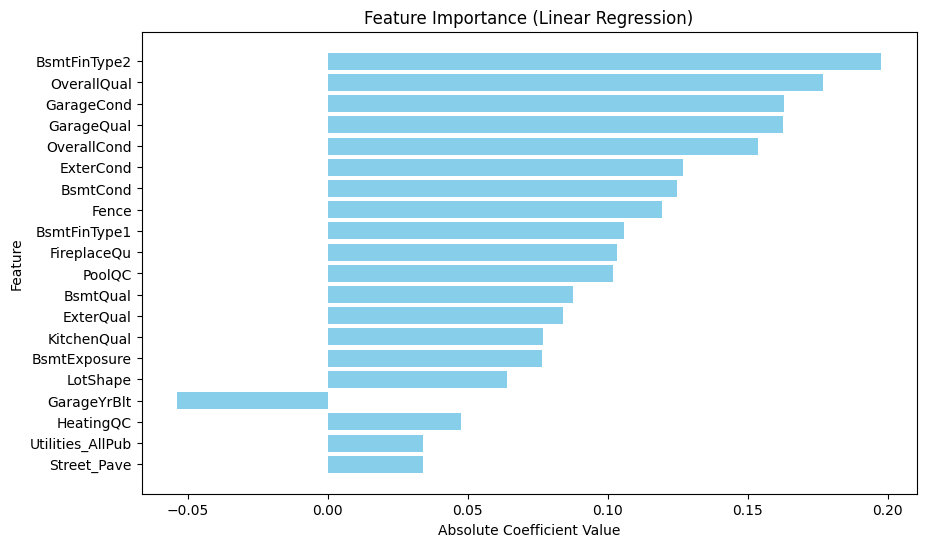

In [ ]:
#Linear Regression
plt.figure(figsize=(10, 6))
plt.barh(top_20['Feature'], top_20['Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Linear Regression)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

##Predicting Kaggle Test Set

In [ ]:
kaggle_test = pd.read_csv('https://raw.githubusercontent.com/allyjavier/house-prices/refs/heads/main/test.csv')

kaggle_test1 = kaggle_test.copy()
kaggle_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
kaggle_test.drop('Id', axis=1, inplace = True)

#Imputing missing values

#Features with NA descriptions = None
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'):
    kaggle_test[col] = kaggle_test[col].fillna('None')

#'Garage' - Object dtypes with missing data, replace with 'None'
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    kaggle_test[col] = kaggle_test[col].fillna('None')

#'Garage' - Float and int dtypes with missing data, replace with 0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    kaggle_test[col] = kaggle_test[col].fillna(0)

#'Bsmt'- Object dtypes with missing data, replace with 'None'
for col in ('BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1'):
    kaggle_test[col] = kaggle_test[col].fillna('None')

#'Mas' features
kaggle_test["MasVnrType"] = kaggle_test["MasVnrType"].fillna("None") #Object
kaggle_test["MasVnrArea"] = kaggle_test["MasVnrArea"].fillna(0) #Float

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
#Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood
kaggle_test["LotFrontage"] = kaggle_test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#String dtype, impute with mode
kaggle_test['Electrical'] = kaggle_test['Electrical'].fillna(kaggle_test['Electrical'].mode()[0])

#Converting numerical variables to strings to accurately reflect their categorical nature.
kaggle_test['MSSubClass'] = kaggle_test['MSSubClass'].apply(str)
kaggle_test['YrSold'] = kaggle_test['YrSold'].astype(str)
kaggle_test['MoSold'] = kaggle_test['MoSold'].astype(str)

#Add new features
kaggle_test['TotalSF'] = (kaggle_test['TotalBsmtSF'] + kaggle_test['1stFlrSF'] + kaggle_test['2ndFlrSF']) #total square footage
kaggle_test['Bathrooms'] = kaggle_test['FullBath'] + kaggle_test['HalfBath']*0.5 #total bathrooms
kaggle_test['YrBltAndRemod'] = (kaggle_test['YearBuilt'] + kaggle_test['YearRemodAdd'])/2 #year built and remodelled

for col in ('BsmtHalfBath', 'BsmtFullBath', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'TotalSF'):
    kaggle_test[col] = kaggle_test[col].fillna(0)

#Standardizing the data to minimize outliers
from sklearn.preprocessing import RobustScaler

num_kaggle_test = kaggle_test.select_dtypes(include=['number'])

# Initialize RobustScaler
scaler = RobustScaler()

# Fit and transform the numerical features
for col in num_kaggle_test.columns:
    kaggle_test[col] = scaler.fit_transform(kaggle_test[[col]])

#Label encoding for ordinal categories
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'LotShape', 'LandSlope')
for c in cols:
  labelencoder = LabelEncoder()
  labelencoder.fit(list(kaggle_test[c].values))
  kaggle_test[c] = labelencoder.transform(list(kaggle_test[c].values))

kaggle_test_encoded = pd.get_dummies(kaggle_test)
kaggle_test_encoded

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,TotalSF,Bathrooms,YrBltAndRemod,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.50,0.538713,3,0,4,5,-0.250000,-0.756098,0.000000,3,4,4,4,3,5,0.156915,3,144.0,-0.328436,-0.203846,4,-0

In [ ]:
def align_columns(train_df, test_df):
    # Identify missing columns in the test set
    missing_cols = set(train_df.columns) - set(test_df.columns)

    # Add the missing columns to the test set, filled with False
    for col in missing_cols:
        test_df[col] = False

    # Identify extra columns in the test set that are not in the train set
    extra_cols = set(test_df.columns) - set(train_df.columns)

    # Drop the extra columns from the test set
    test_df.drop(columns=extra_cols, inplace=True)

    # Ensure both DataFrames have the same column order
    test_df = test_df[train_df.columns]

    return test_df


kaggle_test_encoded = align_columns(X_train, kaggle_test_encoded)
kaggle_test_encoded

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,TotalSF,Bathrooms,YrBltAndRemod,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,S

In [ ]:
original_predictions = best_lr_model.predict(kaggle_test_encoded)

# Add the predictions to the original DataFrame
kaggle_test_encoded['SalePrice'] = original_predictions
kaggle_test_encoded.head()

<ipython-input-114-a15d45d0452d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaggle_test_encoded['SalePrice'] = original_predictions


,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,TotalSF,Bathrooms,YrBltAndRemod,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,S

In [ ]:
kaggle_test_encoded.shape

(1459, 270)

In [ ]:
kaggle_test_encoded['SalePrice'] = np.expm1(kaggle_test_encoded["SalePrice"])

<ipython-input-116-1156a362bffc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaggle_test_encoded['SalePrice'] = np.expm1(kaggle_test_encoded["SalePrice"])


In [ ]:
kaggle_test_encoded['Id'] = kaggle_test1['Id']

<ipython-input-117-3c5594a943bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaggle_test_encoded['Id'] = kaggle_test1['Id']


In [ ]:
from google.colab import files

final = kaggle_test_encoded[['Id', 'SalePrice']]

final = final.set_index('Id')

final

,SalePrice
Id,
1461,129644.031351
1462,153698.680262
1463,182725.615973
1464,197380.964754
1465,216784.558261
...,...
2915,83661.550352
2916,90650.704149
2917,171056.607618


In [ ]:
final.to_csv('Group5_HW2_Kaggle.csv')
files.download('Group5_HW2_Kaggle.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Model Performance

In [ ]:
test_r2 = r2_score(final['Original_SalePrice'], final['Original_Predicted_SalePrice'])
test_mae = mean_absolute_error(final['Original_SalePrice'], final['Original_Predicted_SalePrice'])
test_rmse = mean_squared_error(final['Original_SalePrice'], final['Original_Predicted_SalePrice'], squared=False)

print("\nTest R^2:", test_r2)
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)

KeyError: 'Original_SalePrice'